<a href="https://colab.research.google.com/github/okahaya/shift_opt/blob/main/SQAfromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np

def initialize_parameters():
    T = 1.0  # 温度
    tau = 1.0  # 横磁場の強さ
    return T, tau

def initialize_bits(L, N):
    return np.random.choice([0, 1], size=(L, N))

def qubo_energy(bits, Q):
    L, N = bits.shape
    energy = 0.0
    for i in range(L):
        for j in range(N):
            for k in range(N):
                energy += Q[j, k] * bits[i, j] * bits[i, k]
    return energy

def monte_carlo_step(bits, Q, T,max_dE = 1000):
    L, N = bits.shape
    for i in range(L * N):
        layer = np.random.randint(L)
        bit = np.random.randint(N)
        current_bit = bits[layer, bit]
        bits[layer, bit] = 1 - bits[layer, bit]  # ビットを反転させる
        dE = (1 - 2 * current_bit) * (np.dot(Q[bit, :], bits[layer]) - Q[bit, bit])
        dE = np.clip(dE, -max_dE, max_dE)
        if np.random.rand() >= np.exp(-dE / T):
            bits[layer, bit] = current_bit  # 反転を棄却
    return bits

def quantum_annealing(L, N, Q, T, mc_steps, anneal_steps):
    T, tau = initialize_parameters()
    bits = initialize_bits(L, N)

    for i in range(anneal_steps):
        for j in range(mc_steps):
            bits = monte_carlo_step(bits, Q, T)
        T *= 0.95  # 温度を徐々に下げる

    min_energy = float('inf')
    best_bits = None
    for layer in range(L):
        layer_energy = qubo_energy(bits[layer:layer+1, :], Q)
        if layer_energy < min_energy:
            min_energy = layer_energy
            best_bits = bits[layer:layer+1, :].copy()
    min_energy = qubo_energy(best_bits,Q)
    return best_bits, min_energy

L = 3  # 層の数
N = 10  # 各層のビットの数
T = 1.0  # 温度
mc_steps = 100  # モンテカルロステップ数
anneal_steps = 100  # アニーリングステップ数

In [125]:
Q = np.zeros((N,N))
for i in range(N):
    Q[i,i] = -1
for j in range(N):
    for i in range(j,N):
        if i != j:
            Q[i,j] = 2

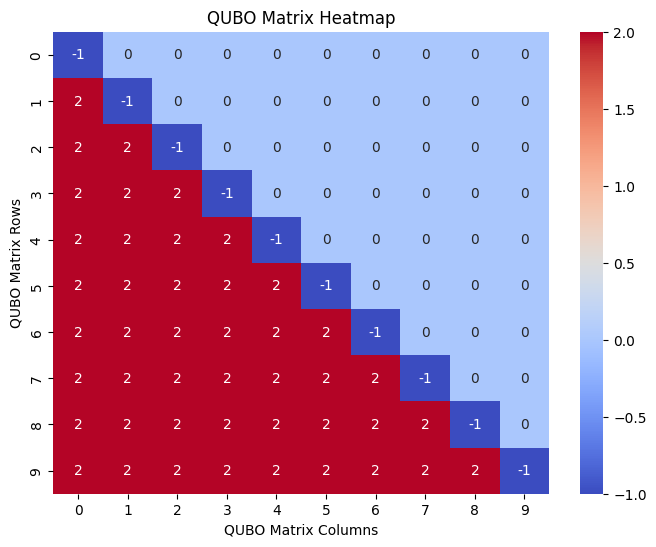

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(Q, annot=True, cmap='coolwarm', cbar=True)
plt.title('QUBO Matrix Heatmap')
plt.xlabel('QUBO Matrix Columns')
plt.ylabel('QUBO Matrix Rows')
plt.show()


In [127]:
# 量子アニーリングを実行
import warnings
warnings.simplefilter('ignore', RuntimeWarning)
best_bits, min_energy = quantum_annealing(L, N, Q, T, mc_steps, anneal_steps)

print("Best bit configuration:")
print(best_bits)
print("Minimum energy:", min_energy)

Best bit configuration:
[[0 0 0 1 1 0 0 0 0 0]]
Minimum energy: 0.0


In [128]:
best_bits = np.array([np.array([1,0,0,0,0,0,0,0,0,0])])

In [129]:
qubo_energy(best_bits,Q)

-1.0